# Heart Disease Detection

## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')

## Importing the data 

In [2]:
df = pd.read_csv('Heart disease dataset.csv')

In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## EDA and Data Visualization 

In [4]:
#renaming column names 
df.rename(columns ={'age':'Age','sex':'Sex','cp':'Chest_pain','trestbps':'Resting_blood_pressure','chol':'Cholesterol','fbs':'Fasting_blood_sugar',
                    'restecg':'ECG_results','thalach':'Maximum_heart_rate','exang':'Exercise_induced_angina','oldpeak':'ST_depression','slope':'ST_slope','ca':'Major_vessels',
                   'thal':'Thalassemia_types'}, inplace = True)

In [6]:
df.columns

Index(['Age', 'Sex', 'Chest_pain', 'Resting_blood_pressure', 'Cholesterol',
       'Fasting_blood_sugar', 'ECG_results', 'Maximum_heart_rate',
       'Exercise_induced_angina', 'ST_depression', 'ST_slope', 'Major_vessels',
       'Thalassemia_types', 'target'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      303 non-null    int64  
 1   Sex                      303 non-null    int64  
 2   Chest_pain               303 non-null    int64  
 3   Resting_blood_pressure   303 non-null    int64  
 4   Cholesterol              303 non-null    int64  
 5   Fasting_blood_sugar      303 non-null    int64  
 6   ECG_results              303 non-null    int64  
 7   Maximum_heart_rate       303 non-null    int64  
 8   Exercise_induced_angina  303 non-null    int64  
 9   ST_depression            303 non-null    float64
 10  ST_slope                 303 non-null    int64  
 11  Major_vessels            303 non-null    int64  
 12  Thalassemia_types        303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [8]:
df.describe()

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.shape

(303, 14)

In [10]:
df.isna().sum()

Age                        0
Sex                        0
Chest_pain                 0
Resting_blood_pressure     0
Cholesterol                0
Fasting_blood_sugar        0
ECG_results                0
Maximum_heart_rate         0
Exercise_induced_angina    0
ST_depression              0
ST_slope                   0
Major_vessels              0
Thalassemia_types          0
target                     0
dtype: int64

In [11]:
#distribution of target column
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [13]:
#Representation of Target variable in Percentage

countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of patients not having heart disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of patients having heart disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of patients not having heart disease: 45.54%
Percentage of patients having heart disease: 54.46%


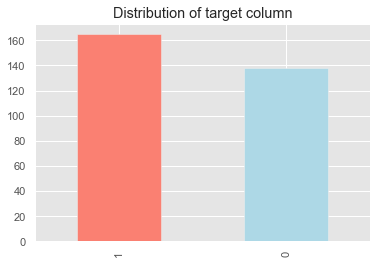

In [17]:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Distribution of target column");
#0 : no disease, 1 : having disease

In [15]:
#Heart disease vs Gender

pd.crosstab(df['target'],df['Sex'])

Sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

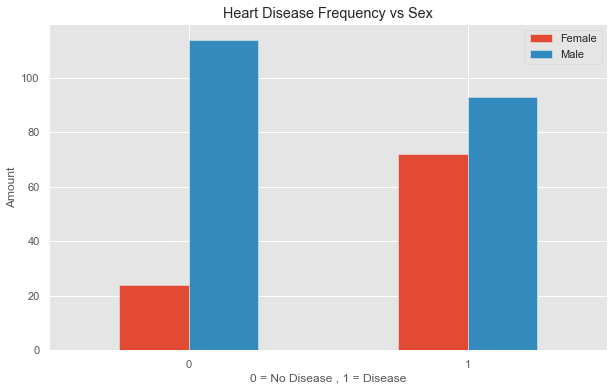

In [16]:
#Create a plot for crosstab

pd.crosstab(df['target'],df['Sex']).plot(kind="bar",figsize=(10,6));
plt.title("Heart Disease Frequency vs Sex")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

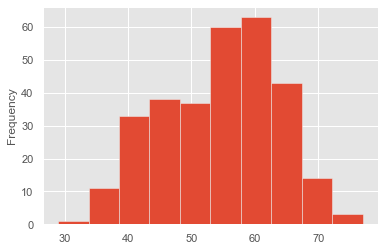

In [18]:
#Max heart rate vs Age

df['Age'].plot(kind='hist');

In [19]:
df['Maximum_heart_rate'].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: Maximum_heart_rate, Length: 91, dtype: int64

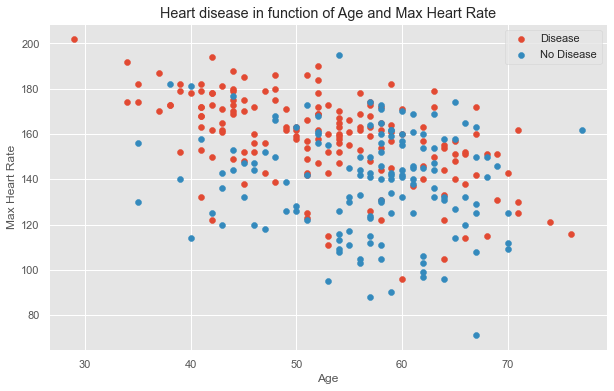

In [20]:
plt.figure(figsize=(10,6))

#Target is equal to 1
plt.scatter(x = df[df['target']==1]['Age'], y = df.Maximum_heart_rate[df.target==1])

#Target is equal to 0
plt.scatter(x = df[df['target']==0]['Age'], y = df.Maximum_heart_rate[df.target==0],);

#Adding some helpful information
plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])

In [21]:
#Heart disease frequency vs Chest pain type

In [22]:
pd.crosstab(df['Chest_pain'],df['target'])

target,0,1
Chest_pain,,
0,104,39
1,9,41
2,18,69
3,7,16


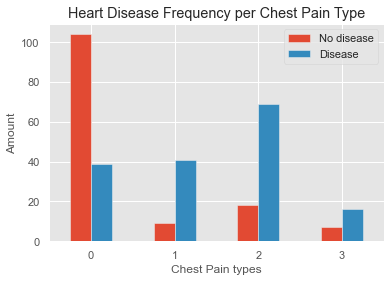

In [23]:
pd.crosstab(df['Chest_pain'],df['target']).plot(kind='bar')
plt.title("Heart Disease Frequency vs Chest Pain Type")
plt.xlabel("Chest Pain types")
plt.ylabel("Amount")
plt.legend(['No disease','Disease'])
plt.xticks(rotation=0);

<AxesSubplot:ylabel='Density'>

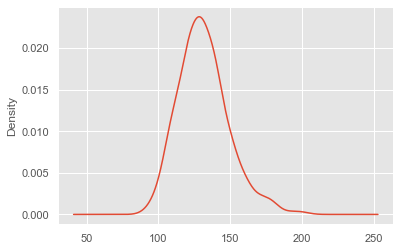

In [25]:
#Resting blood pressure
df['Resting_blood_pressure'].plot(kind='kde')

#Below graoh shows that maximum density is around 120-140

In [26]:
#Heart disease vs Fasting blood sugar

In [27]:
pd.crosstab(df['target'],df['Fasting_blood_sugar'])

Fasting_blood_sugar,0,1
target,,
0,116,22
1,142,23


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

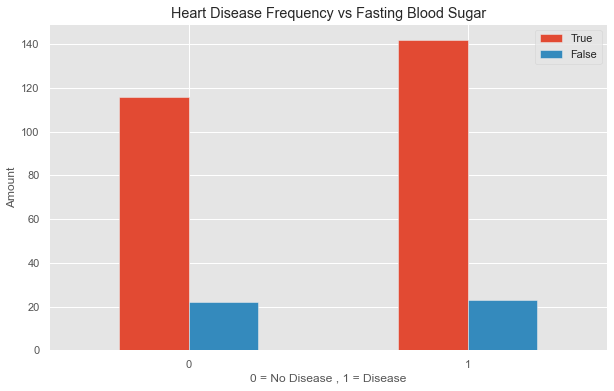

In [28]:
pd.crosstab(df['target'],df['Fasting_blood_sugar']).plot(kind="bar",figsize=(10,6));
plt.title("Heart Disease Frequency vs Fasting Blood Sugar")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["True","False"])
plt.xticks(rotation=0)

In [29]:
#Heart disease vs ECG results

In [30]:
pd.crosstab(df['target'],df['ECG_results'])

ECG_results,0,1,2
target,,,
0,79,56,3
1,68,96,1


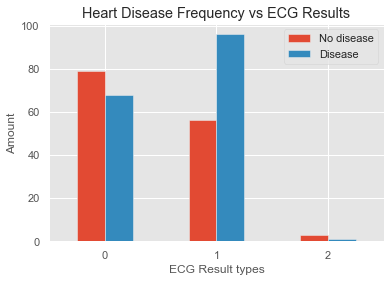

In [31]:
pd.crosstab(df['ECG_results'],df['target']).plot(kind='bar')
plt.title("Heart Disease Frequency vs ECG Results")
plt.xlabel("ECG Result types")
plt.ylabel("Amount")
plt.legend(['No disease','Disease'])
plt.xticks(rotation=0);

In [32]:
#Heart disease vs Thalassemia

In [34]:
pd.crosstab(df['target'],df['Thalassemia_types'])

Thalassemia_types,0,1,2,3
target,,,,
0,1,12,36,89
1,1,6,130,28


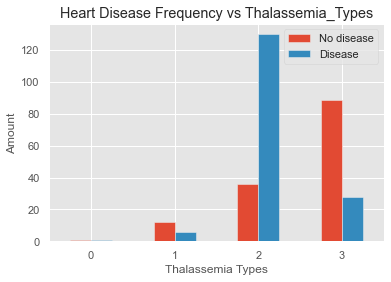

In [35]:
pd.crosstab(df['Thalassemia_types'],df['target']).plot(kind='bar')
plt.title("Heart Disease Frequency vs Thalassemia_Types")
plt.xlabel("Thalassemia Types")
plt.ylabel("Amount")
plt.legend(['No disease','Disease'])
plt.xticks(rotation=0);

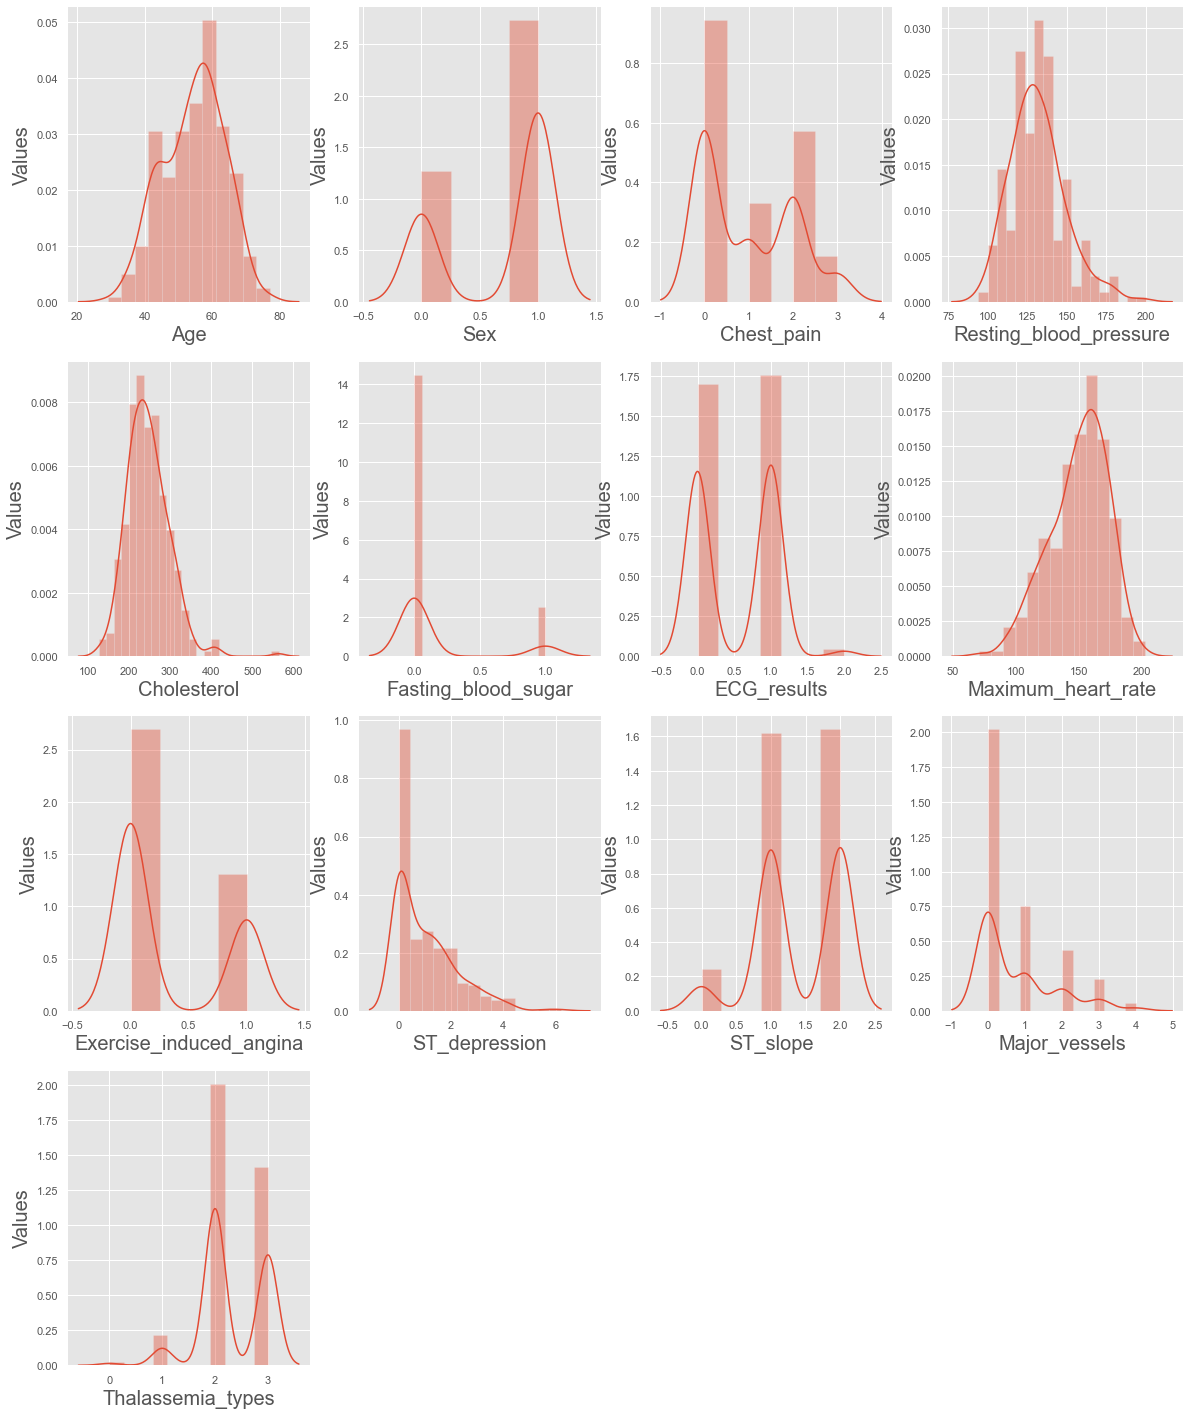

In [38]:
#Plotting the distribution plot.
plt.figure(figsize=(20,25))
plotnumber=1

for column in df:
    if plotnumber<14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Values',fontsize=20)
    plotnumber+=1
plt.show()

In [39]:
df.corr()

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,target
Age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
Sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
Chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
Resting_blood_pressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
Cholesterol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
Fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
ECG_results,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
Maximum_heart_rate,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
Exercise_induced_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
ST_depression,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


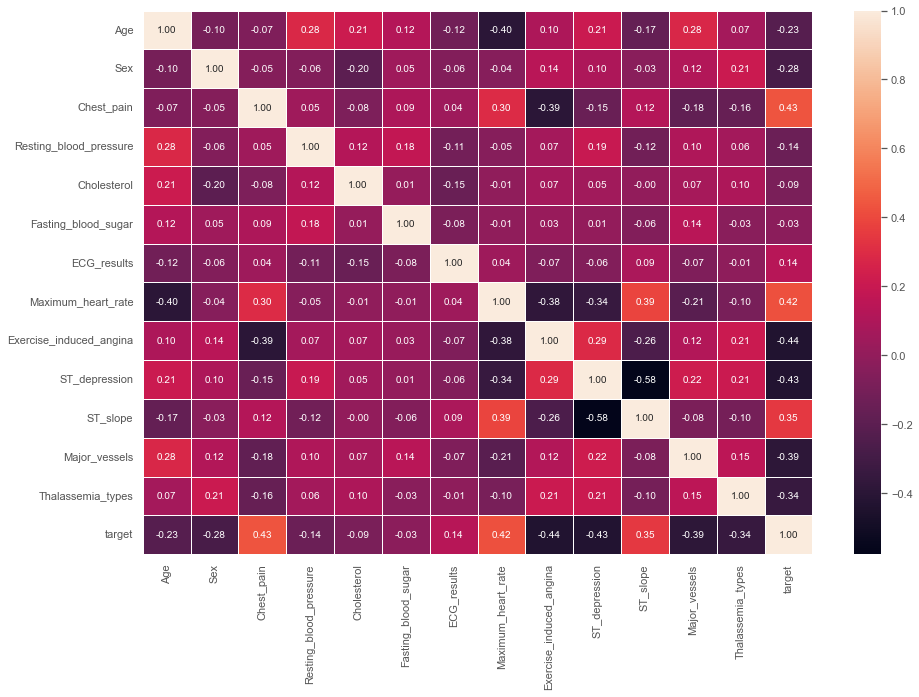

In [40]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [42]:
#checking the variance
df.var()

Age                          82.484558
Sex                           0.217166
Chest_pain                    1.065132
Resting_blood_pressure      307.586453
Cholesterol                2686.426748
Fasting_blood_sugar           0.126877
ECG_results                   0.276528
Maximum_heart_rate          524.646406
Exercise_induced_angina       0.220707
ST_depression                 1.348095
ST_slope                      0.379735
Major_vessels                 1.045724
Thalassemia_types             0.374883
target                        0.248836
dtype: float64

## Data Preprocessing 

In [44]:
#we can see a huge variance so we should normalize it
df['Resting_blood_pressure']=np.log(df['Resting_blood_pressure'])
df['Cholesterol']=np.log(df['Cholesterol'])
df['Maximum_heart_rate']=np.log(df['Maximum_heart_rate'])

np.var(df[["Resting_blood_pressure",'Cholesterol',"Maximum_heart_rate"]])

Resting_blood_pressure    0.016894
Cholesterol               0.041401
Maximum_heart_rate        0.027054
dtype: float64

In [45]:
X = df.drop('target',axis=1)    
Y = df['target']

In [78]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

## Model Building 

### 1) Logistic regression 

In [79]:
accuracies={}

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
log_reg = LogisticRegression(penalty='l2')
log_reg.fit(X_train,Y_train)

Y_pred = log_reg.predict(X_test)

log_reg_acc = accuracy_score(Y_test,Y_pred)
accuracies['LR'] = acc*100
print("Training accuracy score of the model is:",accuracy_score(Y_train, log_reg.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(Y_test,Y_pred)*100,"%")

Training accuracy score of the model is: 84.14096916299559 %
Testing accuracy score of the model is: 82.89473684210526 %


In [80]:
print("Confusion matrix of the model",confusion_matrix(Y_test,Y_pred))

print("Classification Report",classification_report(Y_test,Y_pred))

Confusion matrix of the model [[24  9]
 [ 4 39]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.73      0.79        33
           1       0.81      0.91      0.86        43

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76



### 2) KNN Classifier 

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train,Y_train)

Y_pred = knn.predict(X_test)

knn_acc = accuracy_score(Y_test,Y_pred)
accuracies['KNN'] = knn_acc*100

print("Training accuracy score of the model is:",accuracy_score(Y_train, knn.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(Y_test,Y_pred)*100,"%")

Training accuracy score of the model is: 84.14096916299559 %
Testing accuracy score of the model is: 77.63157894736842 %


In [82]:
print("Confusion matrix of the model",confusion_matrix(Y_test,Y_pred))

print("Classification Report",classification_report(Y_test,Y_pred))

Confusion matrix of the model [[23 10]
 [ 7 36]]
Classification Report               precision    recall  f1-score   support

           0       0.77      0.70      0.73        33
           1       0.78      0.84      0.81        43

    accuracy                           0.78        76
   macro avg       0.77      0.77      0.77        76
weighted avg       0.78      0.78      0.77        76



### 3) Random Forest Classifier 

In [83]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rfc.fit(X_train, Y_train)

Y_pred = rfc.predict(X_test)

rf_acc = accuracy_score(Y_test,Y_pred)
accuracies['RF'] = rf_acc*100

print("Training accuracy score of the model is:",accuracy_score(Y_train, rfc.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(Y_test,Y_pred)*100,"%")

Training accuracy score of the model is: 96.0352422907489 %
Testing accuracy score of the model is: 85.52631578947368 %


In [84]:
print("Confusion matrix of the model",confusion_matrix(Y_test,Y_pred))

print("Classification Report",classification_report(Y_test,Y_pred))

Confusion matrix of the model [[25  8]
 [ 3 40]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.76      0.82        33
           1       0.83      0.93      0.88        43

    accuracy                           0.86        76
   macro avg       0.86      0.84      0.85        76
weighted avg       0.86      0.86      0.85        76



### 4) Gradient Boosting 

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc = GradientBoostingClassifier(learning_rate = 0.05, loss = 'deviance', n_estimators = 180)
gbc.fit(X_train, Y_train)

Y_pred = gbc.predict(X_test)

gbc_acc = accuracy_score(Y_test,Y_pred)
accuracies['GradientBoosting'] = acc*100

print("Training accuracy score of the model is:",accuracy_score(Y_train, gbc.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(Y_test,Y_pred)*100,"%")

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 81.57894736842105 %


In [86]:
print("Confusion matrix of the model",confusion_matrix(Y_test,Y_pred))

print("Classification Report",classification_report(Y_test,Y_pred))

Confusion matrix of the model [[24  9]
 [ 5 38]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.73      0.77        33
           1       0.81      0.88      0.84        43

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.81        76



### 5) XGBoost 

In [87]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 5, n_estimators = 180)

xgb.fit(X_train, Y_train)

[16:49:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=180, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
Y_pred = xgb.predict(X_test)

xgb_acc = accuracy_score(Y_test,Y_pred)

accuracies['XGBoost'] = xgb_acc*100
print("Training accuracy score of the model is:",accuracy_score(Y_train, xgb.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(Y_test,Y_pred)*100,"%")

Training accuracy score of the model is: 95.59471365638767 %
Testing accuracy score of the model is: 80.26315789473685 %


In [89]:
print("Confusion matrix of the model",confusion_matrix(Y_test,Y_pred))

print("Classification Report",classification_report(Y_test,Y_pred))

Confusion matrix of the model [[25  8]
 [ 7 36]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.76      0.77        33
           1       0.82      0.84      0.83        43

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



### Model Comparison 

In [90]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Random Forest', 'Gradient Boosting', 'XgBoost'],
    'Score': [log_reg_acc, knn_acc, rf_acc, gbc_acc, xgb_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Random Forest,0.855263
0,Logistic Regression,0.828947
3,Gradient Boosting,0.815789
4,XgBoost,0.802632
1,KNN,0.776316


In [91]:
import pickle
model = rfc
pickle.dump(model, open("heart.pkl",'wb'))